In [27]:
import pandas as pd
import os, sys
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib import rc

In [2]:
# Inputfolder & files
inputfolder = f"../Data"

# Nakamura dataset

### Description of arrivals CSV

* Rows are referred to the deep moonquake cluster type, i.e. A1, AX (with 'X' being a number).

* Columns are referred to P or S waves detected from different space stations.

	- Space stations from 12 to 16, with data from the station n. 12 being of the highest quality.

	- Wave types being S or P:

		* P-waves: primary waves that arrive first.
		* S-waves: secondary waves that arrive later.

### Description of locations CSV

* Rows are referred to the deep moonquake cluster type, i.e. A1, AX (with 'X' being a number).

* Column description:

	- 'Side': moon side, either Far (F) or Near (N).
	- Coordinates and associated errors.
	- 'Depth' for the moonquake, from 500 to 1500 km.
	- 'Assumed': the arrival-time data are not suficient to determine the depths, thus assumed.

### Description of levent_weber CSV

* No

* Columns of interest:

	- Y, JD, S, E: time register
	- A1: A1 deep moonquakes
	- T1, N1, T2, N2:
	- Grade:
	- Traces:
	- Station + coordinates: [12-16]

In [3]:
# Deep Moonquakes
dm_files = f"_2005_dm_"
arrivals = pd.read_csv(f"{inputfolder}/nakamura{dm_files}arrivals.csv")
locations = pd.read_csv(f"{inputfolder}/nakamura{dm_files}locations.csv")
locations_arrivals_nakamura_dm = locations.merge(arrivals, on="A", how="outer")
if not os.path.exists(f"{inputfolder}/locations_arrivals_nakamura_dm.csv"): locations_arrivals_nakamura_dm.to_csv(f"{inputfolder}/locations_arrivals_nakamura_dm.csv", index=False)
locations_arrivals_nakamura_dm

,A,Side,Lat,Lat_err,Long,Long_err,Depth,Depth_err,Assumed,12P,14P,15P,16P,12S,14S,15S,16S
0,1,N,-15.7,2.4,-36.6,4.6,867.0,29.0,N,138,140,197,184,230,233,341,323
1,3,N,-2.9,1.7,-50.3,6.3,946.0,22.0,N,,122,,,227,230,311,330
2,5,N,1.1,94.2,-44.7,16.4,933.0,109.0,Y,,141,,,232,242,,351
3,6,N,43.5,2.9,55.5,9.5,844.0,33.0,N,190,188,120,155,373,360,245,307
4,7,N,25.0,1.7,53.2,8.0,893.0,27.0,N,180,171,119,127,351,337,243,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,267,227,
162,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,238
163,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,268,243
164,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,185,,280


In [4]:
# Artificial Impacts
ai_files = f"_1983_ai_"
arrivals = pd.read_csv(f"{inputfolder}/nakamura{ai_files}arrivals.csv")
locations = pd.read_csv(f"{inputfolder}/nakamura{ai_files}locations.csv")
locations_arrivals_nakamura_ai = locations.merge(arrivals, on="AI", how="outer")
if not os.path.exists(f"{inputfolder}/locations_arrivals_nakamura_ai.csv"): locations_arrivals_nakamura_ai.to_csv(f"{inputfolder}/locations_arrivals_nakamura_ai.csv", index=False)
locations_arrivals_nakamura_ai

,AI,Lat,Long,Y,JD,Hour,Min,Sec,12P,14P,...,12D,14D,15D,16D,17D,12T,14T,15T,16T,17T
0,12 LM,-3.94,-21.20,69,324,22,17,17.7,NaN,NaN,...,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13 S-IVB,-2.75,-27.86,70,105,1,9,41.0,10:09.6,NaN,...,135,NaN,NaN,NaN,NaN,28.6,NaN,NaN,NaN,NaN
2,14 S-IVB,-8.09,-26.02,71,35,7,40,55.4,41:31.1,NaN,...,172,NaN,NaN,NaN,NaN,35.7,NaN,NaN,NaN,NaN
3,14 LM,-3.42,-19.67,71,38,0,45,26.7,45:52.0,45:44.5,...,114,67.0,NaN,NaN,NaN,25.0,17.8,NaN,NaN,NaN
4,15 S-IVB,-1.51,-11.81,71,210,20,58,42.9,59:37.9,59:19.5,...,355,184.0,NaN,NaN,NaN,55.0,36.6,NaN,NaN,NaN
5,15 LM,26.36,0.25,71,215,3,3,37.0,NaN,NaN,...,1130,1048.0,93.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN
6,17 S-IVB,-4.21,-12.31,72,345,20,32,42.3,33:38.3,33:14.3,...,338,157.0,1032.0,850.0,NaN,56.0,32.0,151.0,123.1,NaN
7,17 LM,19.99,30.51,72,350,6,50,20.8,NaN,NaN,...,1750,1599.0,770.0,986.0,9.0,NaN,NaN,NaN,NaN,5.8


In [5]:
# Shallow Moonquakes
# Remove columns on hour, minute and seconds because different naming conventions
sm_files = f"_sm_"
arrivals = pd.read_csv(f"{inputfolder}/nakamura_1983{sm_files}arrivals.csv").drop(["Hour"], axis=1)
locations = pd.read_csv(f"{inputfolder}/nakamura_1979{sm_files}locations.csv").drop(["H", "M", "S"], axis=1)
locations_arrivals_nakamura_sm = locations.merge(arrivals, on=["Year", "Day"], how="outer")
if not os.path.exists(f"{inputfolder}/locations_arrivals_nakamura_sm.csv"): locations_arrivals_nakamura_sm.to_csv(f"{inputfolder}/locations_arrivals_nakamura_sm.csv", index=False)
locations_arrivals_nakamura_sm

,Year,Day,Lat,Long,Magnitude,Comments,Station,P_YN,P_NG,P_JK,P_PH,P_Mean,S_YN,S_NG,S_JK,S_PH,S_Mean
0,1971.0,107.0,48.0,35.0,2.8,NaN,12.0,9.6,NaN,NaN,10.0,9.8,212.0,NaN,NaN,210.0,211.0
1,1971.0,140.0,42.0,-24.0,2.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,183.0,NaN,NaN,183.5,183.3
2,1971.0,192.0,43.0,-47.0,1.9,Or lat -42 long -60,12.0,58.2,NaN,NaN,54.3,56.2,200.0,NaN,NaN,200.0,200.0
3,1972.0,2.0,54.0,101.0,1.9,NaN,14.0,170.0,NaN,NaN,NaN,170.0,485.0,NaN,NaN,NaN,485.0
4,1972.0,261.0,12.0,46.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1972.0,341.0,51.0,45.0,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1972.0,344.0,-20.0,-80.0,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1973.0,39.0,33.0,35.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1973.0,72.0,-84.0,-134.0,3.2,NaN,12.0,34.2,34.1,34.2,34.0,34.1,267.0,272.0,267.0,NaN,268.7
9,1973.0,171.0,-1.0,-71.0,2.2,NaN,12.0,56.1,55.0,56.0,NaN,55.7,180.0,185.3,187.5,182.0,183.7


# Heatmap based on moonquake depth

In [17]:
lognonne_df = pd.read_csv(f"{inputfolder}/lognonne_2003_catalog.csv")
lognonne_df

,Type,Lat,Long,Depth,Phi,Delta-a,Delta-b,Depth_err,Date,Seconds,...,16P,16P_EC,12S,12S_EC,14S,14S_EC,15S,15S_EC,16S,16S_EC
0,12 LM,-3.94,-21.20,0.0,0,0.0,0.0,0,6911202217,17.70,...,NaN,NaN,56.29,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,13 S-IVB,-2.75,-27.86,0.0,0,0.0,0.0,0,7004150209,41.00,...,NaN,NaN,89.04,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,14 S-IVB,-8.09,-26.02,0.0,0,0.0,0.0,0,7102040740,55.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14 LM,-3.42,-19.67,0.0,0,0.0,0.0,0,7102070045,25.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15 S-IVB,-1.51,-11.81,0.0,0,0.0,0.0,0,7107292058,42.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15 LM,26.36,0.25,0.0,0,0.0,0.0,0,7108030303,37.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16 S-IVB,1.30,-23.80,0.0,0,0.0,0.0,0,7204192102,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,17 S-IVB,-4.21,-12.31,0.0,0,0.0,0.0,0,7212102032,42.30,...,164.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,M,74.10,2.60,0.0,16,2.7,1.1,0,7201040631,19.72,...,NaN,NaN,542.00,2.0,NaN,NaN,350.0,1.0,NaN,NaN
9,M,1.50,-17.10,0.0,-52,0.3,0.2,0,7205130845,39.49,...,181.0,0.0,NaN,NaN,97.5,2.0,NaN,NaN,NaN,NaN


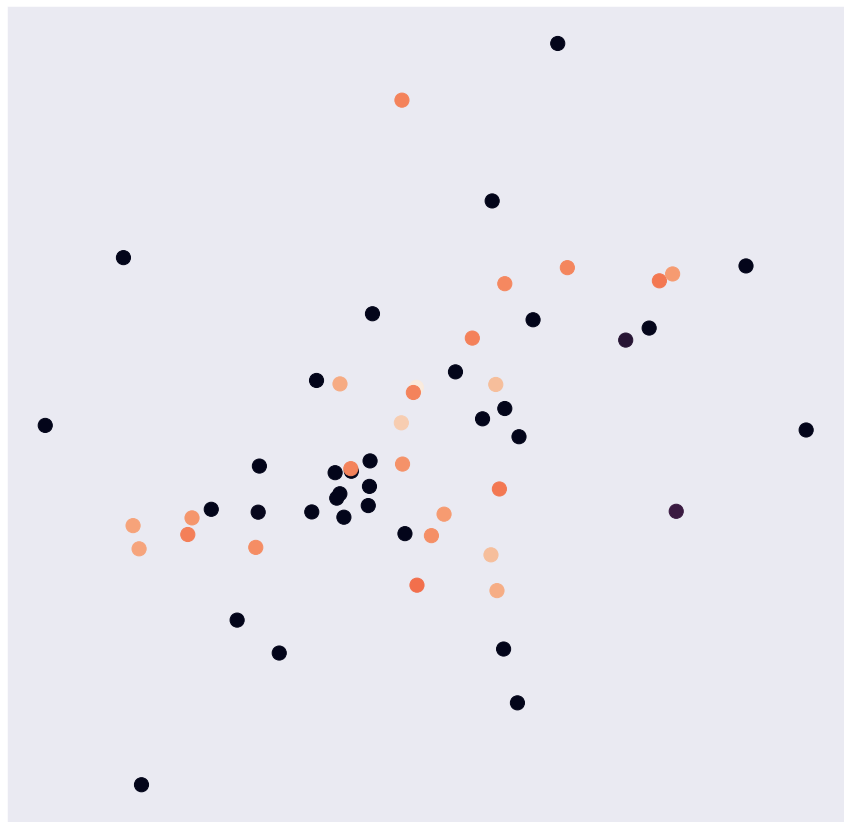

In [31]:
# matplotlib.rcParams['savefig.transparent'] = True

fit_scatter = plt.figure(num=0, clear=True, figsize=(512, 1024))
plt.scatter(lognonne_df.Lat, lognonne_df.Long, s=200, c=lognonne_df.Depth)
plt.xticks(ticks=[], labels=[])
plt.yticks(ticks=[], labels=[])
fit_scatter.savefig("../images/moon_heatmap.png", transparent=True)
# plt.close(fit_scatter)

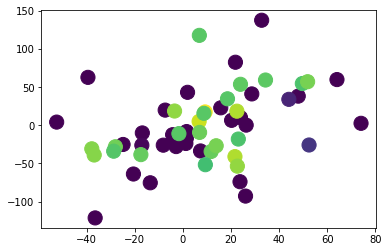

In [18]:
plt.scatter(lognonne_df.Lat, lognonne_df.Long, s=200, c=lognonne_df.Depth)

# Lognonné et al. (2003)